# Klasifikasi PEDANTO InceptionV3

## Modules dan Packages

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.keras
from tensorflow.keras import backend as K
import tensorflow.keras.utils
from glob import glob

from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten, Conv2D, MaxPooling2D, Dropout, Activation, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.models import load_model
from tensorflow.keras.applications.inception_v3 import InceptionV3
from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img, array_to_img, img_to_array

%matplotlib inline
K.clear_session()

## Import Dataset

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
# Define Constants by re-sizing all the images
IMAGE_SIZE = [224, 224]

train_path = '/content/gdrive/My Drive/Colab Notebooks/dataset8020/train'
valid_path = '/content/gdrive/My Drive/Colab Notebooks/dataset8020/val'

##  Data Preprocessing

In [ ]:
def normalize(input_image, input_mask):
    input_image = tf.cast(input_image, tf.float32) / 255.0
    input_mask -= 1
  
    return input_image, input_mask

## InceptionV3

In [ ]:
# Import the InceptionV3 model and here we will be using imagenet weights

inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [ ]:
# We don't need to train existing weights
for layer in inception.layers:
    layer.trainable = False

In [ ]:
# Folders in the Training Set
folders = glob('/content/gdrive/My Drive/Colab Notebooks/dataset8020/train/*')
folders

['/content/gdrive/My Drive/Colab Notebooks/dataset8020/train/Tomato___Spider_mites',
 '/content/gdrive/My Drive/Colab Notebooks/dataset8020/train/Tomato___Septoria_leaf_spot',
 '/content/gdrive/My Drive/Colab Notebooks/dataset8020/train/Tomato___Late_blight',
 '/content/gdrive/My Drive/Colab Notebooks/dataset8020/train/Tomato___Mosaic_virus',
 '/content/gdrive/My Drive/Colab Notebooks/dataset8020/train/Tomato___Leaf_Mold',
 '/content/gdrive/My Drive/Colab Notebooks/dataset8020/train/Tomato___Healthy',
 '/content/gdrive/My Drive/Colab Notebooks/dataset8020/train/Tomato___Bacterial_spot',
 '/content/gdrive/My Drive/Colab Notebooks/dataset8020/train/Tomato___Early_blight',
 '/content/gdrive/My Drive/Colab Notebooks/dataset8020/train/Tomato___Target_Spot',
 '/content/gdrive/My Drive/Colab Notebooks/dataset8020/train/Tomato___Yellow_Leaf_Curl_Virus']

### Membuat Arsitektur Model InceptionV3

In [ ]:
# Model layers -> can add more if required
x = Flatten()(inception.output)
prediction = Dense(len(folders), activation='softmax')(x)

In [ ]:
# Create a model object
model = Model(inputs=inception.input, outputs=prediction)

# View the structure of the model
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_94 (Conv2D)             (None, 111, 111, 32  864         ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_94 (BatchN  (None, 111, 111, 32  96         ['conv2d_94[0][0]']              
 ormalization)                  )                                                           

## Train model

In [ ]:
# Defining the cost and model optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
# Using the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
# Training Generator
training_set = train_datagen.flow_from_directory('/content/gdrive/My Drive/Colab Notebooks/dataset8020/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 8000 images belonging to 10 classes.


In [ ]:
# Testing Generator
test_set = test_datagen.flow_from_directory('/content/gdrive/My Drive/Colab Notebooks/dataset8020/val',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 2000 images belonging to 10 classes.


In [ ]:
# fit the model, it will take some time to execute
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=5,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/5
250/250 [==============================] - 1502s 6s/step - loss: 4.0302 - accuracy: 0.6111 - val_loss: 2.2804 - val_accuracy: 0.7075
Epoch 2/5
250/250 [==============================] - 1007s 4s/step - loss: 1.8126 - accuracy: 0.7675 - val_loss: 1.3260 - val_accuracy: 0.8045
Epoch 3/5
250/250 [==============================] - 1015s 4s/step - loss: 1.8028 - accuracy: 0.7970 - val_loss: 2.2641 - val_accuracy: 0.7620
Epoch 4/5
250/250 [==============================] - 1022s 4s/step - loss: 1.5416 - accuracy: 0.8234 - val_loss: 0.9595 - val_accuracy: 0.8770
Epoch 5/5
250/250 [==============================] - 1020s 4s/step - loss: 1.5698 - accuracy: 0.8371 - val_loss: 1.3281 - val_accuracy: 0.8495


### Visualization Loss And Accuracy

63/63 [==============================] - 188s 3s/step - loss: 1.3281 - accuracy: 0.8495


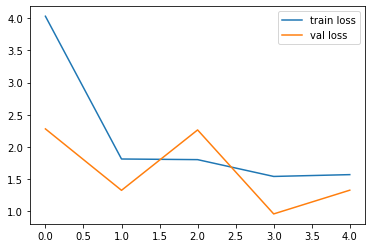

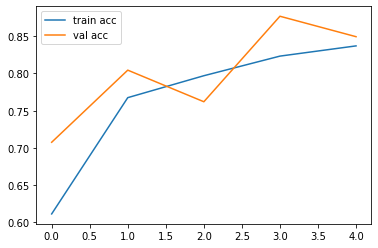

In [ ]:
# Plot the Loss and Accuracy
# Loss
model.evaluate(test_set)
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()

# Accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

### Menyimpan Model

In [ ]:
# Saving the model as a h5 file

from tensorflow.keras.models import load_model
model.save('model_inception.h5')

### Load Model

In [ ]:
model = load_model('model_inception.h5')

OSError: ignored

### Predict

In [ ]:
y_pred = model.predict(test_set)

63/63 [==============================] - 195s 3s/step


In [ ]:
y_pred

array([[0.0000000e+00, 1.9883246e-34, 8.9775664e-01, ..., 1.0224147e-01,
        2.9612454e-15, 1.8457501e-06],
       [1.0475146e-31, 2.4344494e-23, 1.2251389e-19, ..., 9.9999994e-01,
        1.2092257e-21, 6.1555072e-10],
       [6.6823721e-15, 1.9258282e-06, 2.0794512e-06, ..., 3.5903615e-01,
        6.8596691e-11, 2.8802851e-01],
       ...,
       [9.9999994e-01, 1.1173088e-09, 7.8183576e-19, ..., 9.5940103e-11,
        4.4835802e-14, 5.0567840e-16],
       [9.4067271e-14, 3.9219127e-18, 3.4441447e-07, ..., 9.9999624e-01,
        3.0819001e-06, 4.1683735e-20],
       [1.0242016e-26, 5.1891837e-12, 5.6711569e-10, ..., 1.2128113e-14,
        3.9022973e-15, 1.2875653e-19]], dtype=float32)

In [ ]:
y_pred = np.argmax(y_pred, axis=1)

In [ ]:
y_pred

array([2, 7, 7, ..., 0, 7, 6])

In [ ]:
loss_final, accuracy_final = model.evaluate(test_set)

63/63 [==============================] - 189s 3s/step - loss: 1.3281 - accuracy: 0.8495


In [ ]:
print("Final loss: {:.2f}".format(loss_final))
print("Final accuracy: {:.2f}".format(accuracy_final))

Final loss: 1.33
Final accuracy: 0.85


### Predict Insert Image

Saving mosaic.jpg to mosaic (1).jpg
1/1 [==============================] - 0s 144ms/step
3
Leaf Mold


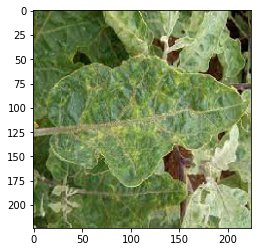

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing import image
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
    path = '/content/' + fn
    img = image.load_img(path, target_size=(224, 224))
    x = image.img_to_array(img)
    plt.imshow(x/255.)
    x = np.expand_dims(x, axis=0)
    images = np.vstack([x])
    classes = model.predict(images, batch_size=32)
    index = tf.argmax(classes[0], axis=0)
    print(classes[0])
    if classes[0][0]==1:
      print("Bacterial spot")
    elif classes[0][1]==1:
      print("Early blight")
    elif classes[0][2]==1:
      print("Late blight")
    elif classes[0][3]==1:
      print("Leaf Mold")
    elif classes[0][4]==1:
      print("Septoria Leaf Spot")
    elif classes[0][5]==1:
      print("Spider Mites")
    elif classes[0][6]==1:
      print("Target Spot")
    elif classes[0][7]==1:
      print("Tomato Yellow Leaf Curl Virus")
    elif classes[0][8]==1:
      print("Tomato Mosaic Virus")
    else:
      print("Healthy")

# Klasifikasi PEDANTO VGG16

## Modules dan Packages

In [ ]:
# Basic Imports
import numpy as np
import matplotlib.pyplot as plt
from glob import glob
from PIL import Image

# Imports untuk membangun CNN
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, load_model

# Ignore Warnings
import warnings
warnings.filterwarnings("ignore")

## Import Dataset

In [ ]:
# Membuat semua foto ter-resize pada ukuran 224x224
IMAGE_SIZE = [224, 224]

categories = ["Tomato___Bacterial_spot", "Tomato___Early_blight", "Tomato___Healthy", "Tomato___Late_blight", 
              "Tomato___Leaf_Mold", "Tomato___Mosaic_virus", "Tomato___Septoria_leaf_spot", "Tomato___Spider_mites", "Tomato___Target_Spot", "Tomato___Yellow_Leaf_Curl_Virus"]

# Mencari file yang terkait pada folder dataset
train_path = '/content/gdrive/MyDrive/Colab Notebooks/dataset8020/train/'
test_path = '/content/gdrive/MyDrive/Colab Notebooks/dataset8020/val/'



## Data Preprocessing

In [ ]:
def normalize(input_image, input_mask):
    input_image = tf.cast(input_image, tf.float32) / 255.0
    input_mask -= 1
  
    return input_image, input_mask

## VGG16

### VGG16 Keras Model untuk Klasifikasi Gambar

In [ ]:
# Menambahkan Layer untuk Preprocessing pada VGG
vgg = VGG16(input_shape = IMAGE_SIZE + [3], 
            weights = 'imagenet',
            include_top=False)

In [ ]:
# Untuk perintah menolak men training data yang telah digunakan sebelumnya
for layer in vgg.layers:
  layer.trainable = False

In [ ]:
# Folders in the Training Set
folders = glob('/content/gdrive/My Drive/Colab Notebooks/dataset8020/train/*')
folders

['/content/gdrive/My Drive/Colab Notebooks/dataset8020/train/Tomato___Spider_mites',
 '/content/gdrive/My Drive/Colab Notebooks/dataset8020/train/Tomato___Septoria_leaf_spot',
 '/content/gdrive/My Drive/Colab Notebooks/dataset8020/train/Tomato___Late_blight',
 '/content/gdrive/My Drive/Colab Notebooks/dataset8020/train/Tomato___Mosaic_virus',
 '/content/gdrive/My Drive/Colab Notebooks/dataset8020/train/Tomato___Leaf_Mold',
 '/content/gdrive/My Drive/Colab Notebooks/dataset8020/train/Tomato___Healthy',
 '/content/gdrive/My Drive/Colab Notebooks/dataset8020/train/Tomato___Bacterial_spot',
 '/content/gdrive/My Drive/Colab Notebooks/dataset8020/train/Tomato___Early_blight',
 '/content/gdrive/My Drive/Colab Notebooks/dataset8020/train/Tomato___Target_Spot',
 '/content/gdrive/My Drive/Colab Notebooks/dataset8020/train/Tomato___Yellow_Leaf_Curl_Virus']

### Menambah Layer pada Model VGG16

In [ ]:
x = Flatten()(vgg.output)
x = Dense(1000, activation='relu')(x)

# Lapisan Terakhir dengan aktivasi softmax untuk output biner 
prediction = Dense(len(categories), activation='softmax')(x)

In [ ]:
# Membuat obbjek model 
model = Model(inputs=vgg.input, outputs=prediction)

# Melihat struktur model
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

## Compile Model

In [ ]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

## Preparing Image For Model

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory(test_path,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 8000 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.


## Train Model

In [ ]:
# Mencocokan model
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=5,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/5
250/250 [==============================] - 3828s 15s/step - loss: 1.4204 - accuracy: 0.6785 - val_loss: 0.5440 - val_accuracy: 0.8035
Epoch 2/5
250/250 [==============================] - 117s 469ms/step - loss: 0.5472 - accuracy: 0.8126 - val_loss: 0.4228 - val_accuracy: 0.8455
Epoch 3/5
250/250 [==============================] - 118s 470ms/step - loss: 0.3846 - accuracy: 0.8696 - val_loss: 0.3903 - val_accuracy: 0.8685
Epoch 4/5
250/250 [==============================] - 118s 472ms/step - loss: 0.3630 - accuracy: 0.8710 - val_loss: 0.3219 - val_accuracy: 0.8870
Epoch 5/5
250/250 [==============================] - 117s 468ms/step - loss: 0.3021 - accuracy: 0.8931 - val_loss: 0.2770 - val_accuracy: 0.9050


### Visualization Loss And Accuracy

63/63 [==============================] - 10s 151ms/step - loss: 0.2770 - accuracy: 0.9050


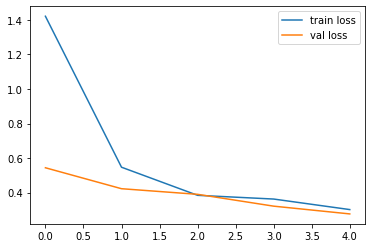

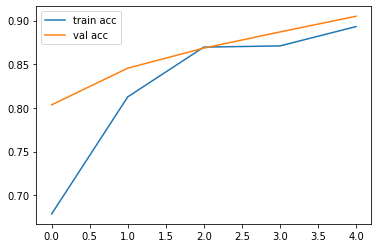

<Figure size 432x288 with 0 Axes>

In [ ]:
# Plot the Loss and Accuracy
# Loss
model.evaluate(test_set)
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# Accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

### Menyimpan Model

In [ ]:
# Saving the model as a h5 file

from tensorflow.keras.models import load_model
model.save('vgg16_model.h5')

### Load Model

In [ ]:
model = load_model('vgg16_model.h5')

### Predict

In [ ]:
y_pred = model.predict(test_set)

63/63 [==============================] - 11s 168ms/step


In [ ]:
y_pred

array([[1.5418239e-04, 7.6563996e-03, 3.5058329e-05, ..., 5.9890544e-01,
        6.0090553e-02, 5.9241982e-04],
       [1.9848589e-09, 3.0925603e-06, 6.3380703e-08, ..., 1.1981122e-05,
        8.5274069e-06, 2.9561184e-08],
       [2.8317691e-05, 2.0588029e-03, 1.0515270e-06, ..., 1.4159037e-02,
        1.1849840e-02, 1.9398154e-04],
       ...,
       [4.0504841e-05, 2.2264179e-04, 2.0513899e-07, ..., 4.9343280e-04,
        4.1385425e-05, 9.9880099e-01],
       [5.0203088e-03, 2.8763310e-05, 4.9834182e-07, ..., 8.6154260e-02,
        9.0686584e-01, 2.8586022e-05],
       [3.1297377e-06, 9.3861883e-05, 1.5117957e-05, ..., 9.9851545e-03,
        8.8743404e-02, 9.8697354e-05]], dtype=float32)

In [ ]:
y_pred = np.argmax(y_pred, axis=1)

In [ ]:
y_pred

array([7, 5, 4, ..., 9, 8, 4])

In [ ]:
loss_final, accuracy_final = model.evaluate(test_set)

63/63 [==============================] - 14s 219ms/step - loss: 0.2770 - accuracy: 0.9050


In [ ]:
print("Final loss: {:.2f}".format(loss_final))
print("Final accuracy: {:.2f}".format(accuracy_final))

Final loss: 0.28
Final accuracy: 0.90


### Predict Insert Image

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Saving healthy.jpg to healthy.jpg
1/1 [==============================] - 1s 782ms/step
1
Early blight


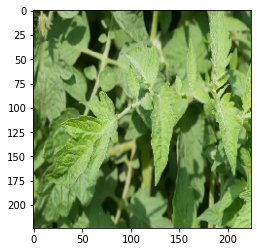

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
    path = '/content/' + fn
    img = image.load_img(path, target_size=(224, 224))
    x = image.img_to_array(img)
    plt.imshow(x/255.)
    x = np.expand_dims(x, axis=0)
    images = np.vstack([x])
    classes = model.predict(images, batch_size=32)
    index = tf.argmax(classes[0], axis=0)
    print(classes[0])
    if classes[0][0]==1:
      print("Bacterial spot")
    elif classes[0][1]==1:
      print("Early blight")
    elif classes[0][2]==1:
      print("Late blight")
    elif classes[0][3]==1:
      print("Leaf Mold")
    elif classes[0][4]==1:
      print("Septoria Leaf Spot")
    elif classes[0][5]==1:
      print("Spider Mites")
    elif classes[0][6]==1:
      print("Target Spot")
    elif classes[0][7]==1:
      print("Tomato Yellow Leaf Curl Virus")
    elif classes[0][8]==1:
      print("Tomato Mosaic Virus")
    else:
      print("Healthy")

# Klasifikasi PEDANTO RESNET152V2

## Modules & Packages

In [1]:
# Basic Imports
import numpy as np
import matplotlib.pyplot as plt
from glob import glob
from PIL import Image

# Imports untuk membangun model
from tensorflow import keras
from keras.models import Model
from tensorflow.keras.applications import ResNet152V2
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, load_model

# Ignore Warnings
import warnings
warnings.filterwarnings("ignore")

## Import Dataset

In [2]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [3]:
import os
os.chdir('/content/gdrive/MyDrive/Colab Notebooks/dataset8020/')
os.listdir()

['vgg16_model.h5',
 'model_inception.h5',
 'model_Resnet152V2.h5',
 'train',
 'val',
 'model_resnet152V2.h5']

In [4]:
# Folders in the Train Set
folders = glob('/content/gdrive/My Drive/Colab Notebooks/dataset8020/train/*')
folders

['/content/gdrive/My Drive/Colab Notebooks/dataset8020/train/Tomato___Bacterial_spot',
 '/content/gdrive/My Drive/Colab Notebooks/dataset8020/train/Tomato___Early_blight',
 '/content/gdrive/My Drive/Colab Notebooks/dataset8020/train/Tomato___Healthy',
 '/content/gdrive/My Drive/Colab Notebooks/dataset8020/train/Tomato___Late_blight',
 '/content/gdrive/My Drive/Colab Notebooks/dataset8020/train/Tomato___Leaf_Mold',
 '/content/gdrive/My Drive/Colab Notebooks/dataset8020/train/Tomato___Mosaic_virus',
 '/content/gdrive/My Drive/Colab Notebooks/dataset8020/train/Tomato___Septoria_leaf_spot',
 '/content/gdrive/My Drive/Colab Notebooks/dataset8020/train/Tomato___Spider_mites',
 '/content/gdrive/My Drive/Colab Notebooks/dataset8020/train/Tomato___Target_Spot',
 '/content/gdrive/My Drive/Colab Notebooks/dataset8020/train/Tomato___Yellow_Leaf_Curl_Virus']

In [5]:
# Folders in the Test Set
folders = glob('/content/gdrive/My Drive/Colab Notebooks/dataset8020/val/*')
folders

['/content/gdrive/My Drive/Colab Notebooks/dataset8020/val/Tomato___Bacterial_spot',
 '/content/gdrive/My Drive/Colab Notebooks/dataset8020/val/Tomato___Early_blight',
 '/content/gdrive/My Drive/Colab Notebooks/dataset8020/val/Tomato___Healthy',
 '/content/gdrive/My Drive/Colab Notebooks/dataset8020/val/Tomato___Late_blight',
 '/content/gdrive/My Drive/Colab Notebooks/dataset8020/val/Tomato___Leaf_Mold',
 '/content/gdrive/My Drive/Colab Notebooks/dataset8020/val/Tomato___Mosaic_virus',
 '/content/gdrive/My Drive/Colab Notebooks/dataset8020/val/Tomato___Septoria_leaf_spot',
 '/content/gdrive/My Drive/Colab Notebooks/dataset8020/val/Tomato___Spider_mites',
 '/content/gdrive/My Drive/Colab Notebooks/dataset8020/val/Tomato___Target_Spot',
 '/content/gdrive/My Drive/Colab Notebooks/dataset8020/val/Tomato___Yellow_Leaf_Curl_Virus']

In [6]:
#Forming Dataset
datagen = keras.preprocessing.image.ImageDataGenerator(rescale=1/255)

# Training and validation dataset
train = datagen.flow_from_directory('/content/gdrive/MyDrive/Colab Notebooks/dataset8020/train/', seed=123, subset='training')

# Test dataset for evaluation
datagen2 = keras.preprocessing.image.ImageDataGenerator(rescale=1/255)

test = datagen2.flow_from_directory('/content/gdrive/MyDrive/Colab Notebooks/dataset8020/val/')

Found 8000 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.


## Exploratory Data Analysis

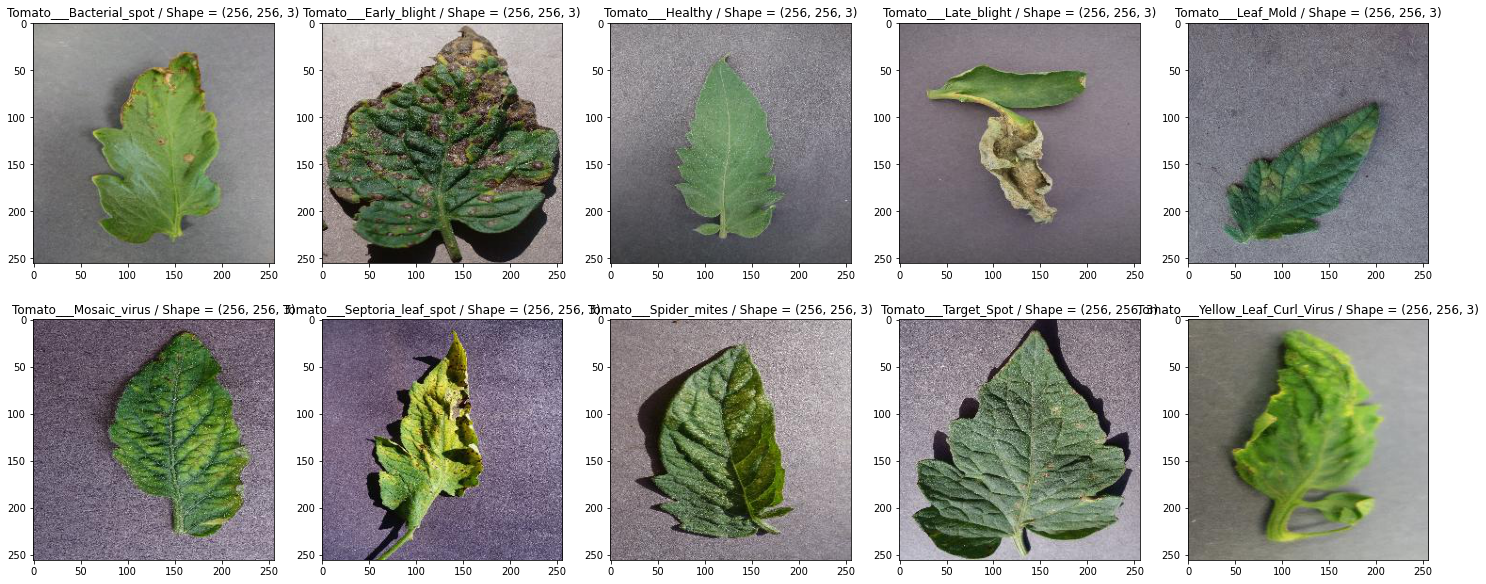

In [7]:
# Training data visualization

classes = os.listdir('/content/gdrive/MyDrive/Colab Notebooks/dataset8020/train')

plt.figure(figsize=(25,10))

for i in enumerate(classes):
    pic = os.listdir('/content/gdrive/MyDrive/Colab Notebooks/dataset8020/train/'+i[1])[0]
    image = Image.open('/content/gdrive/MyDrive/Colab Notebooks/dataset8020/train/'+i[1]+'/'+pic)
    image = np.asarray(image)
    plt.subplot(2,5,i[0]+1)
    plt.title('{0} / Shape = {1}'.format(i[1], image.shape))
    plt.imshow(image)
plt.show()

## Data Preprocessing

In [8]:
def normalize(input_image, input_mask):
    input_image = tf.cast(input_image, tf.float32) / 255.0
    input_mask -= 1
  
    return input_image, input_mask

## Model RESNET152V2

In [9]:
# Function to initialize model (ResNet152V2)

def get_model():
    
    base_model = ResNet152V2(input_shape=(256,256,3), include_top=False)
    
    for layers in base_model.layers[:140]:
        layers.trainable = False
    for layers in base_model.layers[140:]:
        layers.trainable = True
        
    
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(1000, activation='relu')(x)
    pred = Dense(10, activation='softmax')(x)
    
    model = Model(inputs=base_model.input, outputs=pred)
    
    return model

In [10]:
# Model initialization
model = get_model()
model.summary()

234545216/234545216 [==============================] - 11s 0us/step
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 262, 262, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 128, 128, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                          

## Training Model

In [11]:
# Model training
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics='accuracy')
model.fit(train, batch_size=32, epochs=5, validation_data=test)

Epoch 1/5
250/250 [==============================] - 6429s 26s/step - loss: 0.5649 - accuracy: 0.8292 - val_loss: 0.2556 - val_accuracy: 0.9155
Epoch 2/5
250/250 [==============================] - 199s 796ms/step - loss: 0.0687 - accuracy: 0.9824 - val_loss: 0.1668 - val_accuracy: 0.9460
Epoch 3/5
250/250 [==============================] - 209s 836ms/step - loss: 0.0216 - accuracy: 0.9958 - val_loss: 0.1762 - val_accuracy: 0.9485
Epoch 4/5
250/250 [==============================] - 204s 815ms/step - loss: 0.0135 - accuracy: 0.9974 - val_loss: 0.1525 - val_accuracy: 0.9555
Epoch 5/5
250/250 [==============================] - 208s 830ms/step - loss: 0.0136 - accuracy: 0.9965 - val_loss: 0.1401 - val_accuracy: 0.9545


## Evaluate Model

In [12]:
model.evaluate(test)

63/63 [==============================] - 19s 301ms/step - loss: 0.1401 - accuracy: 0.9545


[0.1401241570711136, 0.9545000195503235]

In [13]:
loss_final, accuracy_final = model.evaluate(test)

63/63 [==============================] - 19s 301ms/step - loss: 0.1401 - accuracy: 0.9545


In [14]:
print("Final loss: {:.2f}".format(loss_final))
print("Final accuracy: {:.2f}".format(accuracy_final))

Final loss: 0.14
Final accuracy: 0.95


## Prediction

1/1 [==============================] - 0s 32ms/step


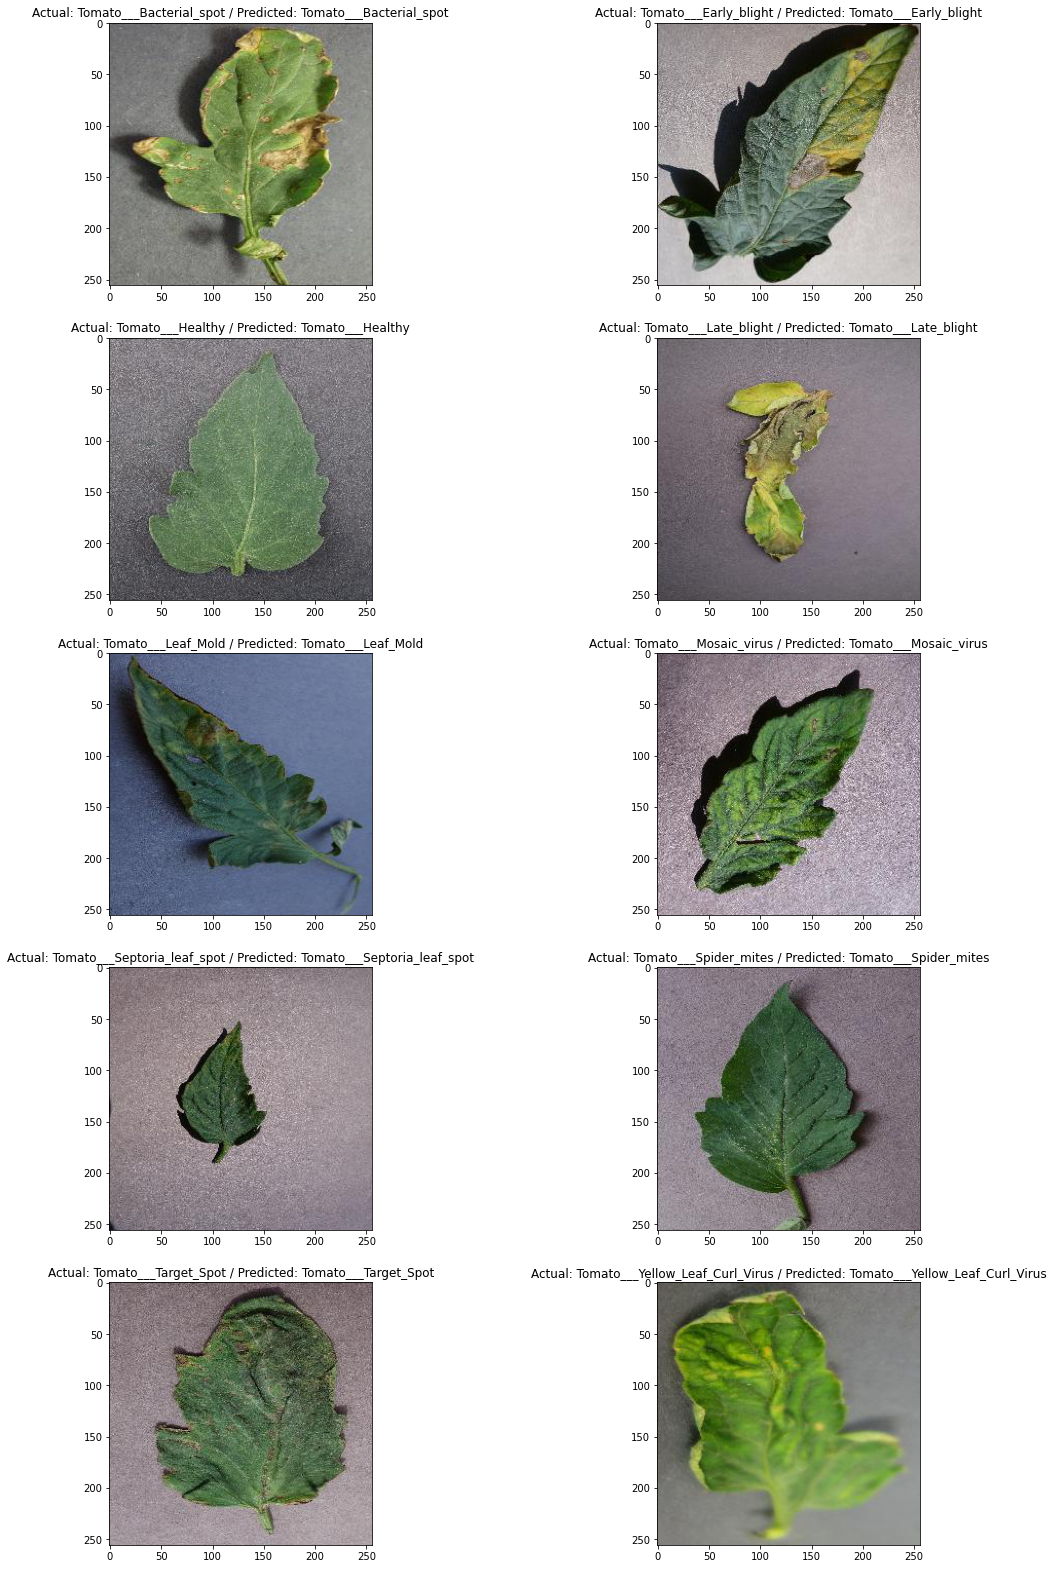

In [15]:
# Prediction and visualizations

classes = os.listdir('/content/gdrive/MyDrive/Colab Notebooks/dataset8020/val')

plt.figure(figsize=(18,28))

for i in enumerate(classes):
    pic = os.listdir('/content/gdrive/MyDrive/Colab Notebooks/dataset8020/val/'+i[1])
    pic = pic[np.random.randint(len(pic)-1)]
    image = Image.open('/content/gdrive/MyDrive/Colab Notebooks/dataset8020/val/'+i[1]+'/'+pic)
    image = np.asarray(image)
    
    pred = np.argmax(model.predict(image.reshape(-1,256,256,3)/255))
    for j in list(enumerate(list(test.class_indices.keys()))):
        if pred == j[0]:
            prediction =  j[1]
    
    plt.subplot(5,2,i[0]+1)
    plt.title('Actual: {0} / Predicted: {1}'.format(i[1], prediction))
    plt.imshow(image)
plt.show()

### Predict test

In [16]:
y_pred = model.predict(test)
y_pred = np.argmax(y_pred, axis=1)

63/63 [==============================] - 20s 294ms/step


## Save Model

In [17]:
# Saving the model as a h5 file

from tensorflow.keras.models import load_model
model.save('model_resnet152V2_tf.h5')

## Load Model

In [18]:
model = load_model('model_resnet152V2_tf.h5')

## Prediction Uploads Image

Saving Tomato Yellow Leaf Curl Virus.JPG to Tomato Yellow Leaf Curl Virus.JPG
1/1 [==============================] - 1s 657ms/step
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
Healthy


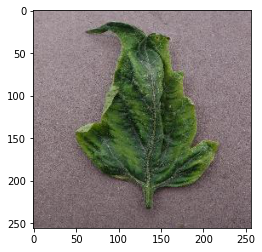

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
    path = '/content/gdrive/MyDrive/Colab Notebooks/uploads/' + fn
    img = image.load_img(path, target_size=(256, 256, 3))
    x = image.img_to_array(img)
    plt.imshow(x/255.)
    x = np.expand_dims(x, axis=0)
    images = np.vstack([x])
    classes = model.predict(images, batch_size=32)
    index = tf.argmax(classes[0], axis=0)
    print(classes[0])
    if classes[0][0]==1:
      print("Bacterial spot")
    elif classes[0][1]==1:
      print("Early blight")
    elif classes[0][2]==1:
      print("Late blight")
    elif classes[0][3]==1:
      print("Leaf Mold")
    elif classes[0][4]==1:
      print("Septoria Leaf Spot")
    elif classes[0][5]==1:
      print("Spider Mites")
    elif classes[0][6]==1:
      print("Target Spot")
    elif classes[0][7]==1:
      print("Tomato Yellow Leaf Curl Virus")
    elif classes[0][8]==1:
      print("Tomato Mosaic Virus")
    else:
      print("Healthy")

## Prediction Uploads Image Fixing

Saving bacterial spot 1.JPG to bacterial spot 1.JPG
1/1 [==============================] - 0s 35ms/step
pred: 0
Spider Mites


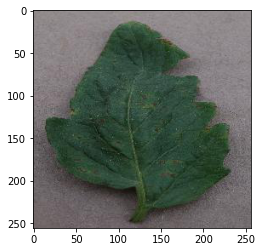

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
    # path =  lokasi filenya, fn itu lokasi file local di google colab  
    path = '/content/gdrive/MyDrive/Colab Notebooks/uploads/' + fn
    img = image.load_img(path, target_size=(256, 256, 3))
    x = image.img_to_array(img)
    #xx=np.asarray(img)
    #print ("X:",x)
    #print ("XX:",xx)
    plt.imshow(x/255.)
    x = np.expand_dims(x, axis=0)
    images = np.asarray(img)
    #print ("images: ", images)
    pred = np.argmax(model.predict(images.reshape(-1,256,256,3)/255))
    print ("pred:",pred)
    if pred==0:
      print("Spider Mites")
    elif pred==1:
      print("Septoria Leaf Spot")
    elif pred==2:
      print("Late blight")
    elif pred==3:
      print("Mosaic Virus")
    elif pred==4:
      print("Leaf Mold")
    elif pred==5:
      print("Healthy")
    elif pred==6:
      print("Bacterial Spot")
    elif pred==7:
      print("Early Blight")
    elif pred==8:
      print("Target Spot")
    else:
      print("Yellow Leaf Curl Virus")

## Predict Uploads Image Fix


Saving bacterial spot 1.JPG to bacterial spot 1.JPG
1/1 [==============================] - 2s 2s/step
pred: 0
Bacterial Spot


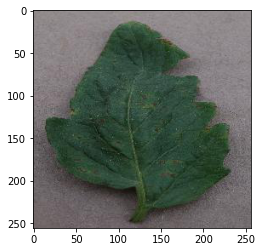

In [19]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
    # path =  lokasi filenya, fn itu lokasi file local di google colab  
    path = '/content/gdrive/MyDrive/Colab Notebooks/uploads/' + fn
    img = image.load_img(path, target_size=(256, 256, 3))
    x = image.img_to_array(img)
    #xx=np.asarray(img)
    #print ("X:",x)
    #print ("XX:",xx)
    plt.imshow(x/255.)
    x = np.expand_dims(x, axis=0)
    images = np.asarray(img)
    #print ("images: ", images)
    pred = np.argmax(model.predict(images.reshape(-1,256,256,3)/255))
    print ("pred:",pred)
    if pred==0:
      print("Bacterial Spot")
    elif pred==1:
      print("Early Blight")
    elif pred==2:
      print("Healthy")
    elif pred==3:
      print("Late Blight")
    elif pred==4:
      print("Leaf Mold")
    elif pred==5:
      print("Mosaic Virus")
    elif pred==6:
      print("Septoria Leaf Spot")
    elif pred==7:
      print("Spider Mites")
    elif pred==8:
      print("Target Spot")
    else:
      print("Yellow Leaf Curl Virus")